<a href="https://colab.research.google.com/github/BaluGDB/AirQualityIndex_Project/blob/main/AirQualityIndexPrediction_XgboostRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/My Drive/MLProjects/AQI_Prediction/Data1/Real-Data/Real_Combine.csv')

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


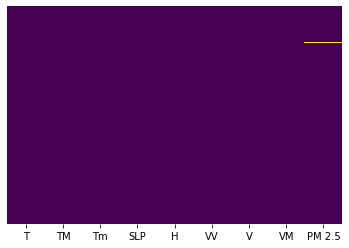

In [5]:
## Check for null values

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df=df.dropna()

In [7]:
x = df.iloc[:,:-1] ### Independent features
y = df.iloc[:,-1] ### Dependent features

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


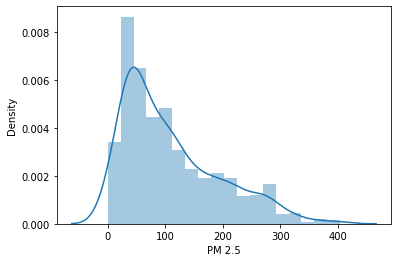

In [8]:
sns.distplot(y)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

**XgBoost Regressor**

In [11]:
import xgboost as xgb

In [18]:
regressor=xgb.XGBRegressor(objective='reg:squarederror')
regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [19]:
print("Coeffficient of determination R^2 ---on train set:  {}".format(regressor.score(x_train, y_train)))

Coeffficient of determination R^2 ---on train set:  0.8606305938167513


In [20]:
print("Coeffficient of determination R^2 ---on test set:  {}".format(regressor.score(x_test, y_test)))

Coeffficient of determination R^2 ---on test set:  0.7210652962292528


In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv=5)

In [22]:
score.mean()

0.6582827367763413

**Model Evaluation**

In [23]:
prediction = regressor.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


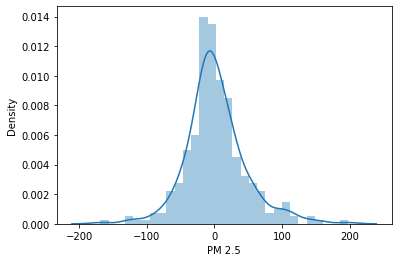

In [26]:
sns.distplot(y_test-prediction)

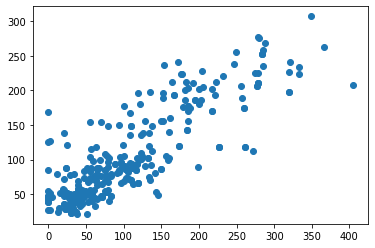

In [27]:
plt.scatter(y_test, prediction)

**Hyperparameter Tuning**

In [28]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [30]:
### RandomizedSearchCV

# Number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Various learning rate parameters
learning_rate = ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

# Subsample parameter values
subsample = [0.6, 0.7, 0.8]

# Minimum chile weight parameters
min_child_weight = [3,4,5,6,7]


In [31]:
# Create the random grid

random_grid = {'n_estimators' : n_estimators,
               'learning_rate' : learning_rate,
               'max_depth' : max_depth,
               'subsample': subsample,
               'min_child_weight' : min_child_weight}
print(random_grid) 

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.6, 0.7, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [32]:
## Use the ramdom grid to search for best hyperparameters
# First create the base model to tune

regressor=xgb.XGBRegressor()

In [34]:
# Random search for parameters, using 3 fold cross validation
# Search across 100 different combinations

xg_random = RandomizedSearchCV(estimator=regressor, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=1)

In [36]:
xg_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[01:01:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[01:01:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[01:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.2s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[01:01:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.3s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[01:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.6, n

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                            

In [37]:
xg_random.best_params_

{'learning_rate': '0.05',
 'max_depth': 30,
 'min_child_weight': 3,
 'n_estimators': 1100,
 'subsample': 0.8}

In [38]:
xg_random.best_score_

-1380.5446667169047

In [39]:
prediction = xg_random.predict(x_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


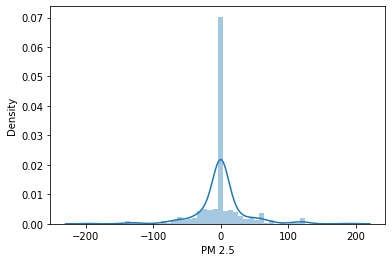

In [40]:
sns.distplot(y_test - prediction)

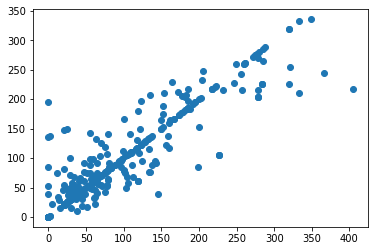

In [41]:
plt.scatter(y_test, prediction)

In [42]:
from sklearn import metrics

print ('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print ('MSE: ', metrics.mean_squared_error(y_test, prediction))
print ('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  19.02743707274397
MSE:  1355.708107839994
RMSE:  36.8199417142395


In [44]:
import pickle

In [45]:
### Open a file where you want to store the data

file = open('xgboost_regression_model.pkl', 'wb')

### Dump information to that file
pickle.dump(xg_random, file)